In [1]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile('KIC 8462852', quarter=16).download(quality_bitmask='hardest')

In [43]:
%matplotlib inline

import numpy as np

import lightkurve as lk

<Axes: title={'center': 'Target ID: 8462852, Cadence: 66714'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

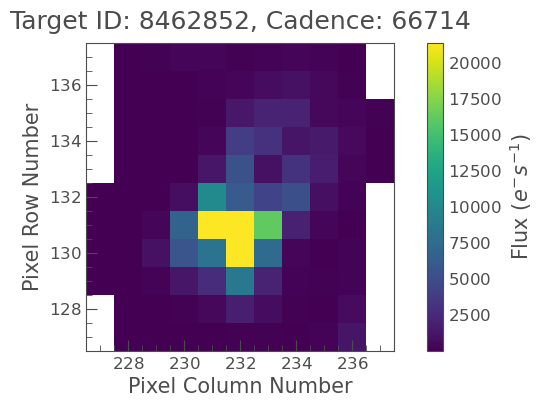

In [2]:
pixelfile.plot(frame=1)

<Axes: title={'center': 'Target ID: 8462852, Cadence: 68385'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

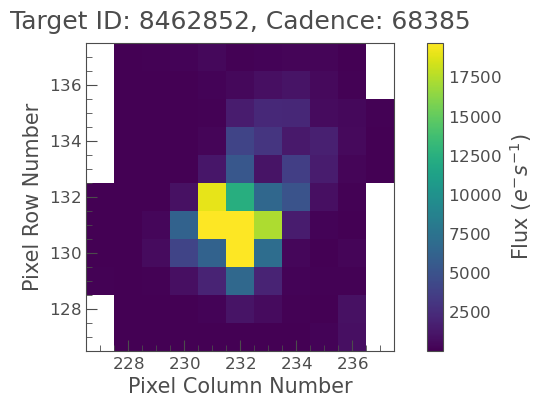

In [15]:
pixelfile.plot(frame=1000)

In [4]:
lc = pixelfile.to_lightcurve(aperture_mask='all')

In [6]:
lc.time, lc.flux

(<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.89718798 1557.9380561
  1557.95849016]>,
 <Quantity [258645.03, 258660.05, 258690.08, ..., 258929.86, 258884.66,
            258865.6 ] electron / s>)

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

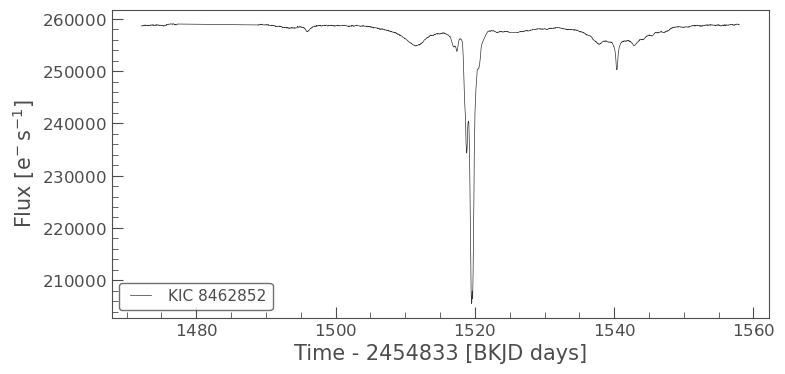

In [17]:
lc.plot()

In [23]:
pixelFile = search_targetpixelfile('KIC 6922244', quarter=4).download()

C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [20]:
lc = pixelFile.to_lightcurve(aperture_mask=pixelFile.pipeline_mask)

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

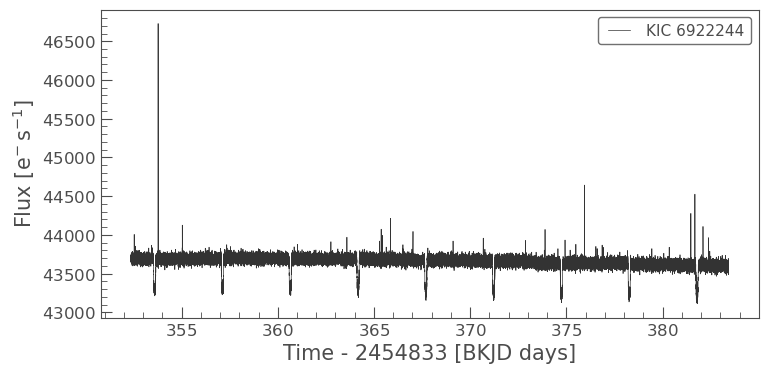

In [21]:
lc.plot()

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

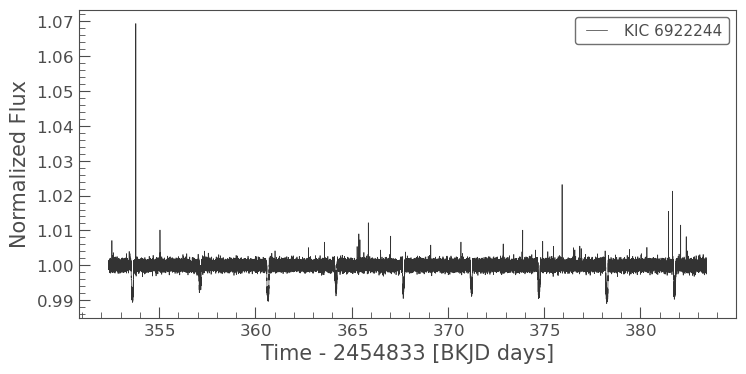

In [25]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot()

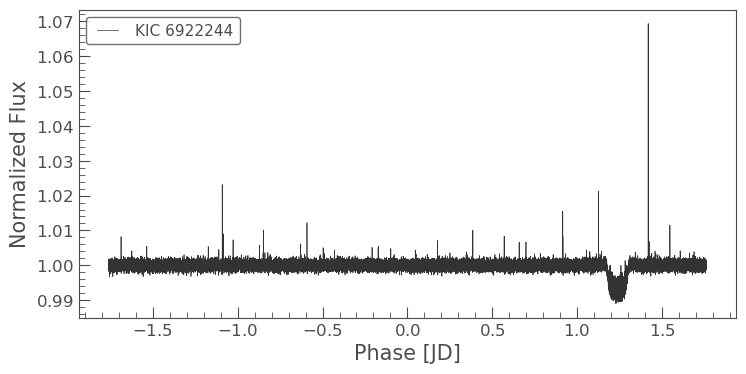

In [31]:
folded_lc = flat_lc.fold(period=3.5225)
ax = folded_lc.plot()

C:\Users\danie\AppData\Local\Temp\ipykernel_10220\1351632587.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=10)


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

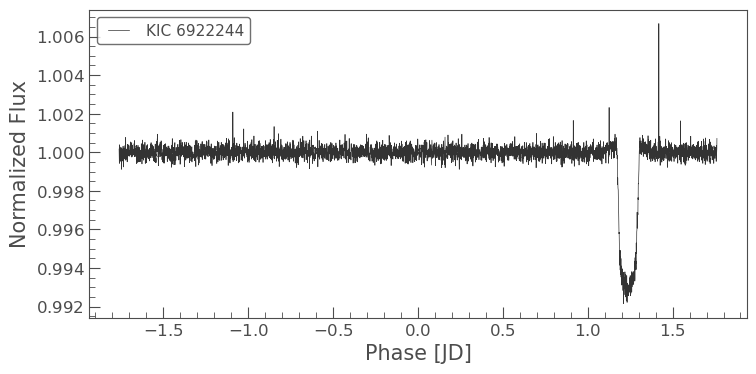

In [38]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.plot()

C:\Users\danie\AppData\Local\Temp\ipykernel_10220\1544668880.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot()


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

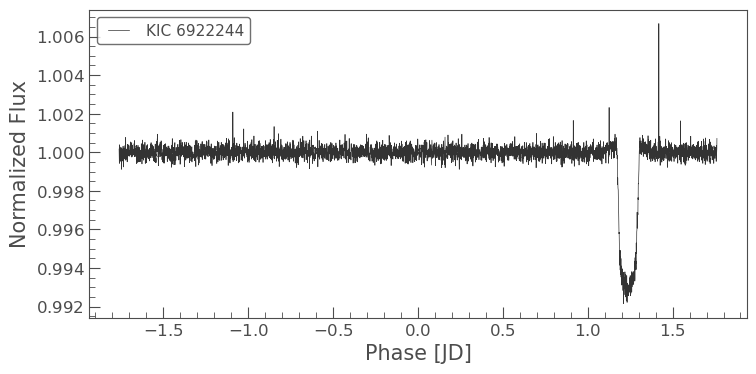

In [39]:
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot()

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

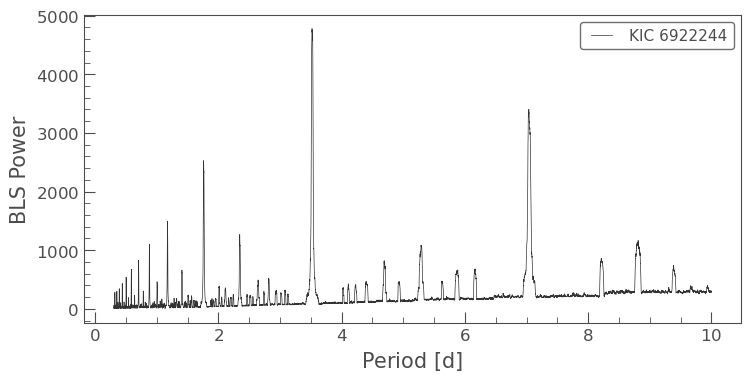

In [37]:
periodogram = flat_lc.to_periodogram(
    method='bls', 
    period=np.arange(0.3, 10, 0.001),
    duration=0.01)
periodogram.plot()

In [41]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.5f}'.format(best_fit_period))

Best fit period: 3.51900 d


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

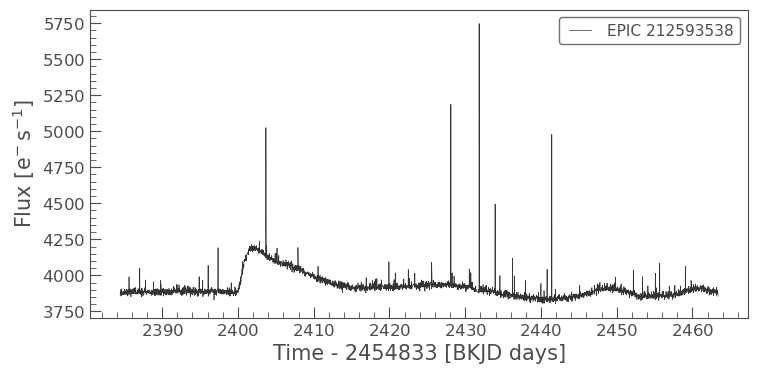

In [42]:
tpf = search_targetpixelfile('EPIC 212593538', campaign=6).download()
lc = tpf.to_lightcurve(aperture_mask='all')
lc.plot()

In [56]:
search_result = lk.search_targetpixelfile('Pi Mensae', mission='TESS', sector=1)
tpf = search_result.download(quality_bitmask='default')

C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [52]:
tpf.mission

'TESS'

<Axes: title={'center': 'Target ID: 261136679, Cadence: 70445'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

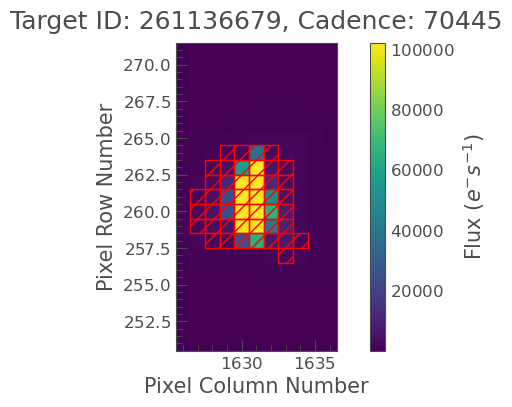

In [59]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

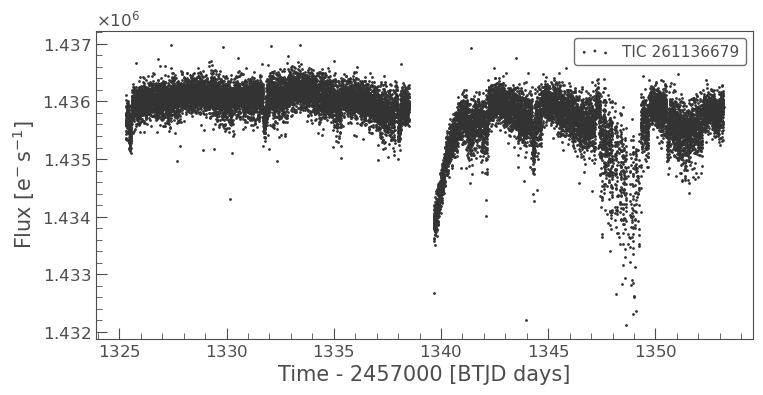

In [46]:
lc = tpf.to_lightcurve()
lc.scatter()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

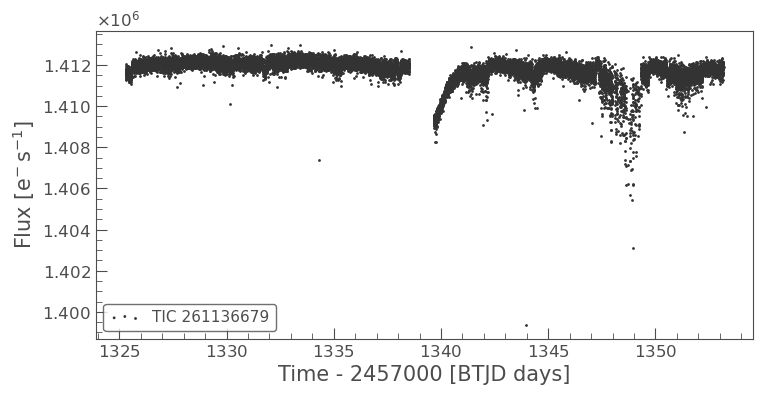

In [62]:
aperture_mask = tpf.create_threshold_mask(threshold=10)
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.scatter()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

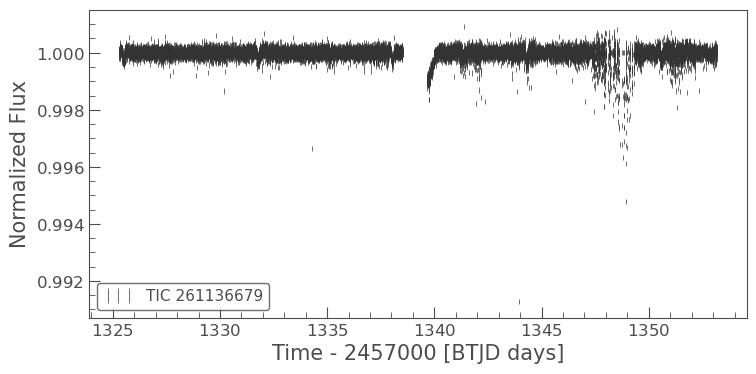

In [64]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

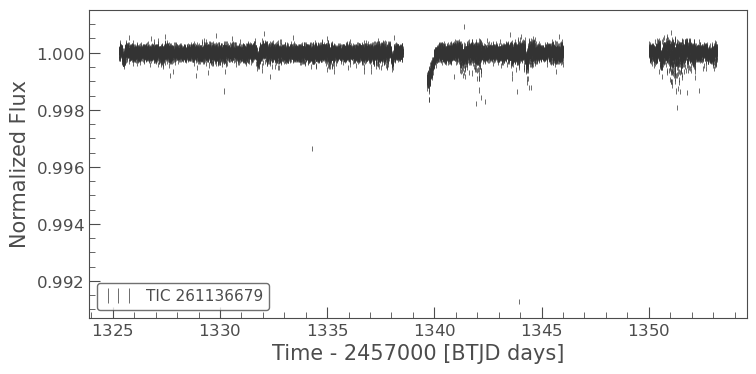

In [68]:
mask = (flat_lc.time.value < 1346) | (flat_lc.time.value > 1350)
masked_lc = flat_lc[mask]
masked_lc.errorbar()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

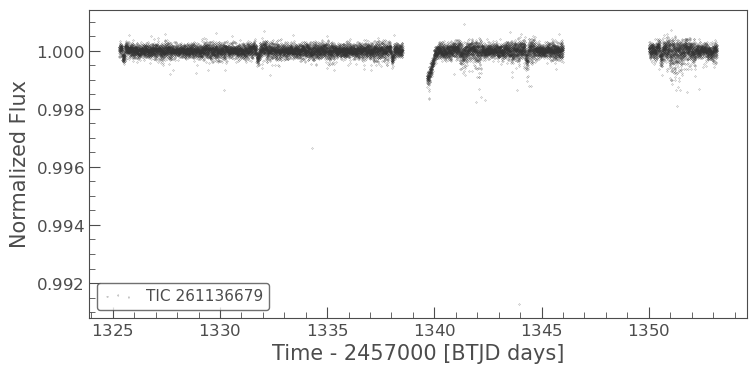

In [69]:
mask = (flat_lc.time.value < 1346) | (flat_lc.time.value > 1350)
masked_lc = flat_lc[mask]
masked_lc.scatter(s=0.1)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

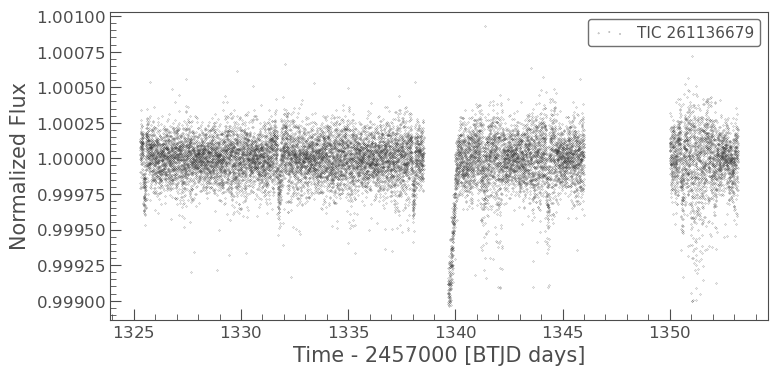

In [71]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.scatter(s=0.1)

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

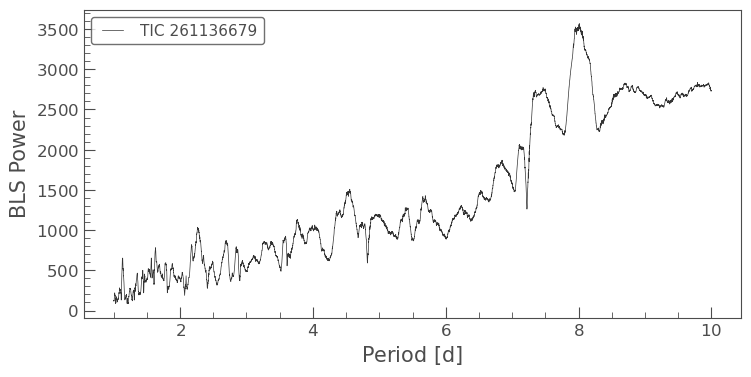

In [73]:
periodogram = clipped_lc.to_periodogram(method='bls', period=np.arange(1, 10, 0.001))
periodogram.plot()

In [74]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 8.010 d


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

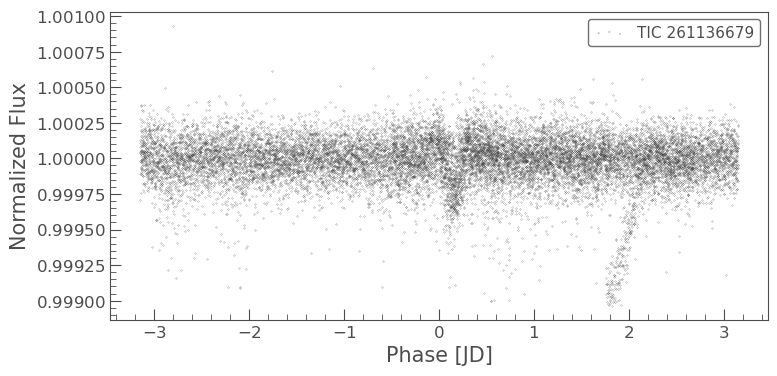

In [75]:
folded_lc = clipped_lc.fold(period=6.300)
folded_lc.scatter(s=0.1)

C:\Users\danie\AppData\Local\Temp\ipykernel_10220\1351632587.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=10)


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

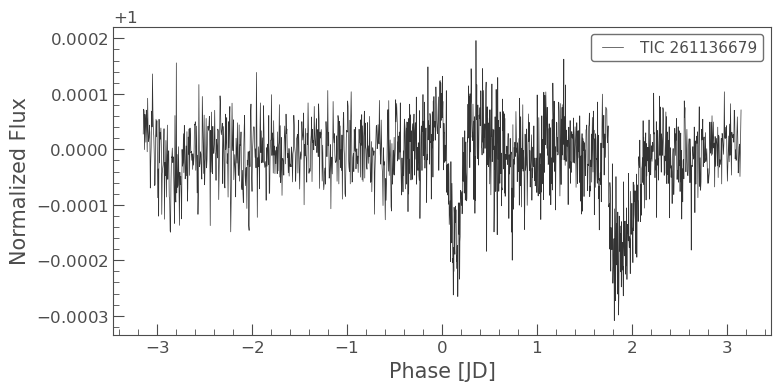

In [77]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.plot()